# Simulation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Problem Setup

An airline has a flight with $6$ seats. They always sell $12$ tickets for this flight and ticket holders show up independently with probability $𝑝$. Plot the following quantities as a function of $𝑝$.

1. Expected number of ticket holders that show up
2. Probability that the flight is overbooked
3. Expected number of ticket holders who show up but don’t fly given that the flight is overbooked

---

## Approximating Expected Value
For each probability of showing up in $[0.1, 0.2, \cdots, 1.0]$:
+ simulate the arrival for `num_trial` times
+ count the number of arrived passengers for each trial
+ calculate the average number of arrived passengers across the different trials of that probability of passenger showing up



In [ ]:
results = np.zeros((10, 2))
num_trials = 100000
num_tickets = 12
num_seats = 6
for i, p in enumerate(np.linspace(0.1, 1.0, num=10)):
    arrivals = np.random.random((num_tickets, num_trials)) < p
    num_arrivals = arrivals.sum(axis=0)
    results[i] = [p, num_arrivals.mean()]
results

array([[ 0.1    ,  1.1979 ],
       [ 0.2    ,  2.40012],
       [ 0.3    ,  3.59882],
       [ 0.4    ,  4.80081],
       [ 0.5    ,  5.99147],
       [ 0.6    ,  7.20708],
       [ 0.7    ,  8.40454],
       [ 0.8    ,  9.60879],
       [ 0.9    , 10.8087 ],
       [ 1.     , 12.     ]])

Text(0.5, 1.0, 'Expected number of ticket holders that show up')

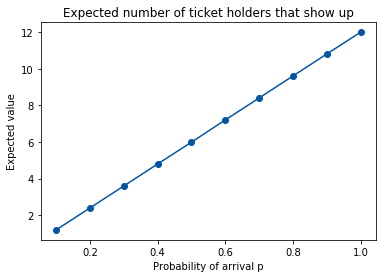

In [ ]:
plt.plot(results[:, 0], results[:, 1], color='#0455A4', marker='o', linestyle='-')
plt.xlabel('Probability of arrival p')
plt.ylabel('Expected value')
plt.title('Expected number of ticket holders that show up')

## Approximating Probability

In [ ]:
results = np.zeros((10, 2))
num_trials = 100000
num_tickets = 12
num_seats = 6
for i, p in enumerate(np.linspace(0.1, 1.0, num=10)):
    arrivals = np.random.random((num_tickets, num_trials)) < p
    num_arrivals = arrivals.sum(axis=0)
    indicator_overbooked = num_arrivals > num_seats
    results[i] = [p, indicator_overbooked.mean()]
results

array([[1.0000e-01, 6.0000e-05],
       [2.0000e-01, 4.1200e-03],
       [3.0000e-01, 3.8680e-02],
       [4.0000e-01, 1.5812e-01],
       [5.0000e-01, 3.8908e-01],
       [6.0000e-01, 6.6428e-01],
       [7.0000e-01, 8.8272e-01],
       [8.0000e-01, 9.8120e-01],
       [9.0000e-01, 9.9953e-01],
       [1.0000e+00, 1.0000e+00]])

Text(0.5, 1.0, 'Probability that flight is overbooked')

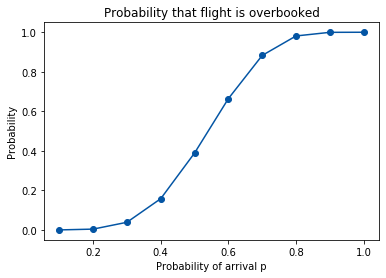

In [ ]:
plt.plot(results[:,0], results[:,1], color='#0455A4', marker='o', linestyle='-')
plt.xlabel('Probability of arrival p')
plt.ylabel('Probability')
plt.title('Probability that flight is overbooked')

## Approximating Conditional Expected Value

In [ ]:
results = np.zeros((10, 2))
num_trials = 100000
num_tickets = 12
num_seats = 6
for i, p in enumerate(np.linspace(0.1, 1.0, num=10)):
    arrivals = np.random.random((num_tickets, num_trials)) < p
    num_arrivals = arrivals.sum(axis=0)
    indicator_overbooked = num_arrivals > num_seats
    num_dont_fly = num_arrivals[indicator_overbooked] - num_seats
    results[i] = [p, num_dont_fly.mean()]
results

array([[0.1       , 1.        ],
       [0.2       , 1.17663043],
       [0.3       , 1.30587024],
       [0.4       , 1.47611495],
       [0.5       , 1.74645609],
       [0.6       , 2.15469398],
       [0.7       , 2.77717891],
       [0.8       , 3.67628855],
       [0.9       , 4.80479435],
       [1.        , 6.        ]])

Text(0.5, 1.0, "Expected number of ticket holders who show up but don't fly given that the flight is overbooked")

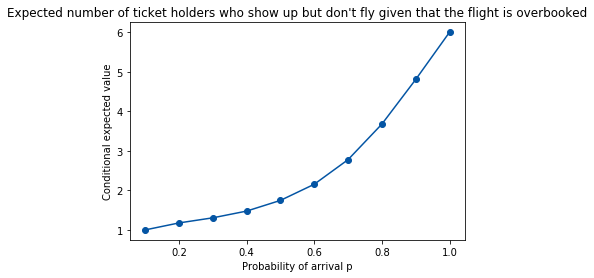

In [ ]:
plt.plot(results[:,0], results[:, 1], color='#0455A4', marker='o', linestyle='-')
plt.xlabel('Probability of arrival p')
plt.ylabel('Conditional expected value')
plt.title("Expected number of ticket holders who show up but don't fly given that the flight is overbooked")

Text(0.5, 1.0, 'Expected number of passengers on the aircraft, given that it flies')

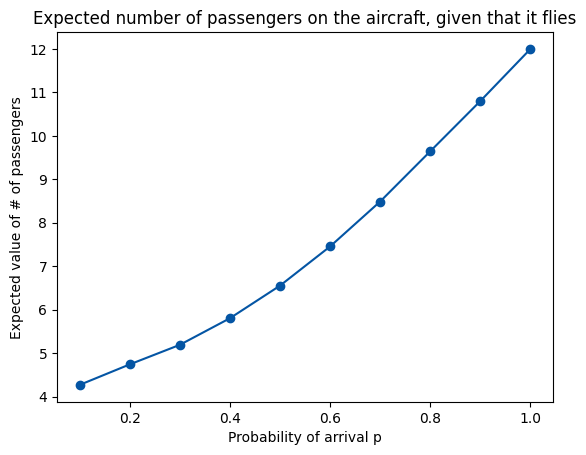

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# During a disaster relief, a pilot will fly the volunteers to the site, he is required not to fly unless at least 4 doctors have arrived by the appointed time. The aircraft has 12 passenger seats and there are 12 volunteers. The probability of a volunteer being a doctor is 0.8. What is the expected number of passengers on the aircraft, given that it flies? (i.e. that at least 4 doctor are on board). Estimate this value with a simulation with  trials and submit your answer as a graph (plot) of a function of the probability (p) of a random volunteer arriving before the appointed time where p=0.1,0.2,...,0.9,1.
results = np.zeros((10, 2))
num_trials = 10000
num_volunteers = 12
num_seats = 12
for i, p in enumerate(np.linspace(0.1, 1.0, num=10)):
    # each entry represents if doctor arrived
    doctors = np.random.random((num_volunteers, num_trials)) < 0.8
    # print(doctors.shape)

    # each entry represents if passenger arrived
    arrivals = np.random.random((num_volunteers, num_trials)) < p
    # print(arrivals)

    good = []
    # only consider trials we know the plane flew (num_doctors >= 4)
    for j in range(num_trials):
        num_doctors = np.logical_and(doctors[:, j], arrivals[:, j])
        if num_doctors.sum() >= 4:
          good.append(j)


    passengers_per_trial = np.zeros(len(good))
    index = 0
    for t in good:
        passengers_per_trial[index] = arrivals[:, t].sum()
        index += 1

    # print(passengers_per_trial)
    results[i] = [p, passengers_per_trial.mean()]

# print(results)
plt.plot(results[:,0], results[:, 1], color='#0455A4', marker='o', linestyle='-')
plt.xlabel('Probability of arrival p')
plt.ylabel('Expected value of # of passengers')
plt.title("Expected number of passengers on the aircraft, given that it flies")
